In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.stats import norm
np.set_printoptions(precision=2)

https://en.wikipedia.org/wiki/Markov_chain

*Definition:* A state $i$ has period $k$ if any return to state $i$ must occur in multiples of $k$ time steps. Formally, the period of a state is defined as $k=\gcd\{n>0: P(X_n=i|X_0=i) > 0\}$ 

In [5]:
from src import markovpccf as m

In [6]:
ts, ps = m.gen_ts_ps(mu=30, sigma=5, t=50, t_step=0.05)

np.sum(ps) 1.0
expected_value 0.00102040816327


In [7]:
plt.plot(ts, ps)
plt.show()

In [8]:
# ps = np.arange(10)
N = len(ts)
P = np.array([np.roll(ps,i) for i in range(N)])
P.shape

(980, 980)

In [9]:
np.set_printoptions(precision=2)

n_iter = 20

PNS = np.zeros((n_iter, N, N))
STATES = np.zeros((N, n_iter))
STATES[0,0] = 1.0

PN = np.dot(P,P)
STATES[0,0] = 1

PNS[0,:,:] = PN
STATES[:,0] = np.dot(PNS[0,:,:],  STATES[:,0])

for k in range(n_iter):
    PN = np.dot(PN, PN)
    PNS[k,:,:] = PN
    STATES[:,k] = np.dot(PN,  STATES[:,k])

(0, 4)

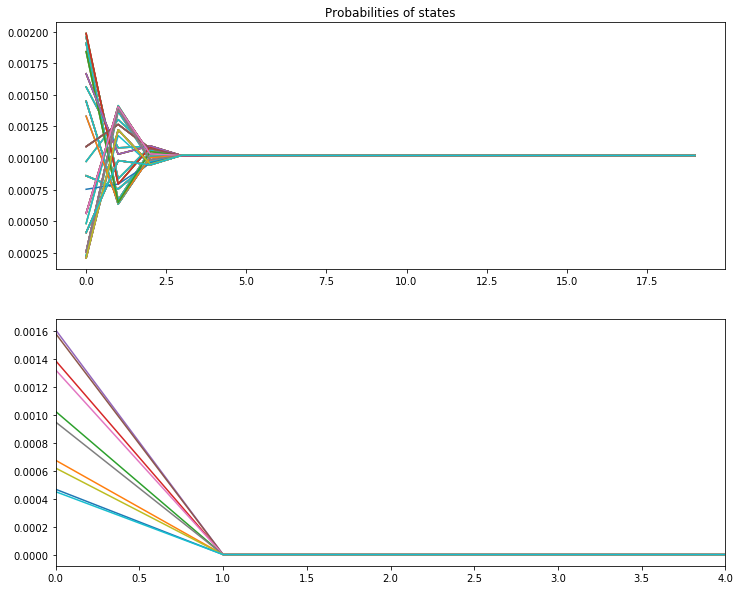

In [14]:
fig = plt.figure(211, figsize=(12,10))
#fig.subtile("T")
ax = fig.add_subplot(211)
ax.set_title("Probabilities of states")
by_step = 100

for i in range(0, N, by_step):
    for j in range(0, N, by_step):
        ax.plot(PNS[:,i,j])
        
ax = fig.add_subplot(212)
for k in range(0, STATES.shape[0], 100):
    ax.plot(STATES[k,:])
plt.xlim([0, 4])

In [199]:
PNS.shape

(20, 980, 980)